In [1]:
import os, sys
parent = os.path.abspath('..')

if not parent in sys.path: sys.path.append(parent)

from src.comparisons import *
from src.bradley_terry.bradley_terry import BradleyTerry
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')


## How fast does the number of strongly connected components decreases?

In [6]:
vote1 = BradleyTerry(ConnectedComponentsComparisons(1000), 20000, rematch=5, p=0.9)

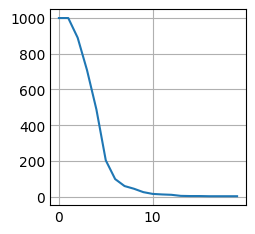

In [7]:
plt.plot(vote1.comparisons._nb_components_memo)
plt.show()

In [8]:
vote1.comparisons._nb_components_memo

[1000,
 1000,
 890,
 708,
 488,
 203,
 98,
 59,
 44,
 25,
 15,
 12,
 10,
 4,
 3,
 3,
 2,
 2,
 2,
 2]

**Conclusion** 

It takes about 20k votes with this method to get to a strongly connected graph. <br>
The decrease speed is the fastest during the first 7k vote

### Compute the components at each iteration

In [9]:
vote2 = BradleyTerry(CCSlow(1000), 20000, rematch=5, p=0.9)

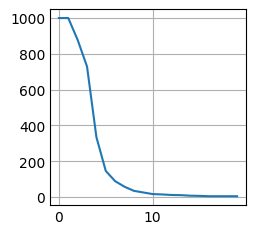

In [10]:
plt.plot(vote2.comparisons._nb_components_memo)
plt.show()

In [10]:
vote2.comparisons._nb_components_memo

[1000,
 1000,
 875,
 730,
 329,
 140,
 80,
 57,
 41,
 31,
 23,
 19,
 16,
 14,
 12,
 10,
 8,
 6,
 5,
 4]

### Cycle around the components

In [32]:
vote3 = BradleyTerry(CCZip(1000), 20000, rematch=5, p=0.9)

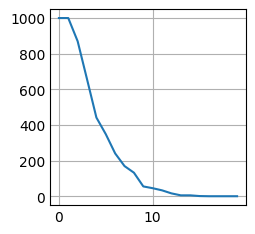

In [33]:
plt.plot(vote3.comparisons._nb_components_memo)
plt.show()

In [34]:
vote3.comparisons._nb_components_memo

[1000,
 1000,
 870,
 657,
 442,
 349,
 241,
 170,
 133,
 56,
 46,
 34,
 17,
 6,
 6,
 2,
 1,
 1,
 1,
 1]

### Comparison

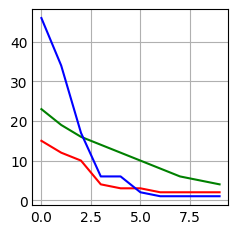

In [40]:
plt.plot(vote1.comparisons._nb_components_memo[-10:], 'r')
plt.plot(vote2.comparisons._nb_components_memo[-10:], 'g')
plt.plot(vote3.comparisons._nb_components_memo[-10:], 'b')
plt.show()

### Conclusion

- The slow method doesn't perform better and is significantly slower
- The zip method reaches one component the fastest but the mid-game is better with the first method (biggest components first)

The choice of the pairing method depends on the budget. For a short budget the biggest components first is good. Otherwise the zip method is better